<a href="https://colab.research.google.com/github/ravi-kiran-iiml/my_git/blob/deep_learning/Bank_marketing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About this dataset:

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


Data source:
http://archive.ics.uci.edu/ml/machine-learning-databases/00222/

we start with uploading the file

In [0]:
# we start with uploading the file

from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [0]:
# uploading as a csv and rendering the top few lines to get a picture of this dataset

import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']))
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Let us look at the column names in this dataset

In [0]:
# Let's have a look at the column headers here

print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


We find several columns have textfield data which we need to convert to numeric forms. 

Columns with text data are:
job / 
marital / 
education / 
default / 
housing /
loan /
contact /
month /
poutcome /
y

so we enumerate these text fields with corresponding columns representing numeric representation of data

In [0]:
from collections import Counter


def enumerator(inputcol, col_enum):
  col_count = Counter(df[inputcol])
  col_cat = list(col_count.keys())
  col_cat_index = list(range(len(col_cat)))
  col_dict = dict(zip(col_cat, col_cat_index))

  list_original = df[inputcol].values
  list_enum = []
  for i in range(len(list_original)):
    for key, value in col_dict.items():
      if list_original[i] == key:
        list_enum.append(value)

  df[col_enum] = list_enum
  return
      

enumerator('job', 'job_enum')
enumerator('marital', 'marital_enum')
enumerator('education', 'education_enum')
enumerator('default', 'default_enum')
enumerator('housing', 'housing_enum')
enumerator('loan', 'loan_enum')
enumerator('contact', 'contact_enum')
enumerator('month', 'month_enum')
enumerator('poutcome', 'poutcome_enum')
enumerator('y', 'y_enum')

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_enum,marital_enum,education_enum,default_enum,housing_enum,loan_enum,contact_enum,month_enum,poutcome_enum,y_enum
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1,1,0,0,0,0,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2,0,1,0,0,1,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,3,0,2,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,4,1,2,0,1,0,0,0,0,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0,1,0,0,0,1,0,0,0,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,2,2,0,1,0,0,0,0,0,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,5,0,3,0,0,0,0,0,0,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,1,1,1,0,0,0,0,0,0,0


so we get the matrix of independent variables 

In [0]:
# we put all of the numeric columns except label, together under X

X = df[['age', 'job_enum',  'balance', 'day', 'duration',  'campaign', 'pdays', 'previous', 'marital_enum', 'education_enum',  'default_enum', 'housing_enum', 'loan_enum', 'contact_enum', 'month_enum', 'poutcome_enum']]
x = X.values
print(x)

[[  58    0 2143 ...    0    0    0]
 [  44    1   29 ...    0    0    0]
 [  33    2    2 ...    0    0    0]
 ...
 [  72    5 5715 ...    1    5    3]
 [  57    3  668 ...    2    5    0]
 [  37    2 2971 ...    1    5    2]]


and the label values

In [0]:
# label is kept under y

y = df['y_enum'].values
print(y)

[0 0 0 ... 1 0 0]


we normalize the independent variables using Standard scaler method

In [0]:
# normalizing all the values of X vectors

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

and we apply train_test_split method to split the dataset in training and validation datasets

In [0]:
# splitting the dataset in training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(36168, 16)
(36168,)
(9043, 16)
(9043,)


we are ready to create the neural network model

In [0]:
# creating the binary classification model

from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Using TensorFlow backend.


and train on the training and validation datasets

In [0]:
# training the dataset with 100 epochs and batch size of 50

h = model.fit(x_train, y_train, epochs = 100, batch_size = 50, validation_data = (x_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/100
36168/36168 [==============================] - 1s 38us/step - loss: 0.3633 - accuracy: 0.8683 - val_loss: 0.2628 - val_accuracy: 0.9031
Epoch 2/100
36168/36168 [==============================] - 1s 29us/step - loss: 0.2795 - accuracy: 0.8937 - val_loss: 0.2495 - val_accuracy: 0.9045
Epoch 3/100
36168/36168 [==============================] - 1s 29us/step - loss: 0.2677 - accuracy: 0.8949 - val_loss: 0.2407 - val_accuracy: 0.9045
Epoch 4/100
36168/36168 [==============================] - 1s 29us/step - loss: 0.2582 - accuracy: 0.8956 - val_loss: 0.2362 - val_accuracy: 0.9042
Epoch 5/100
36168/36168 [==============================] - 1s 28us/step - loss: 0.2555 - accuracy: 0.8950 - val_loss: 0.2337 - val_accuracy: 0.9047
Epoch 6/100
36168/36168 [==============================] - 1s 28us/step - loss: 0.2512 - accuracy: 0.8962 - val_loss: 0.2329 - val_accuracy: 0.9046
Epoch 7/100
36168/36168 [==============================] - 1s 2

we make predictions on the test values

In [0]:
# calculating predictions

predictions = model.predict(x_test)

plotting loss values for training and validation data

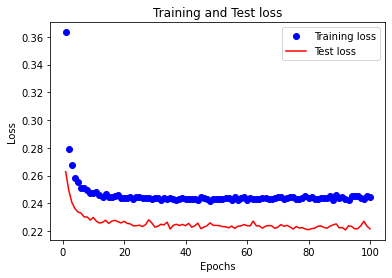

In [0]:
# plotting loss

import matplotlib.pyplot as plt


history_dict =  h.history

train_loss = history_dict['loss']
test_loss = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy'])+1)


plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, test_loss, 'r', label = 'Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

and accuracy plots for training and validation data

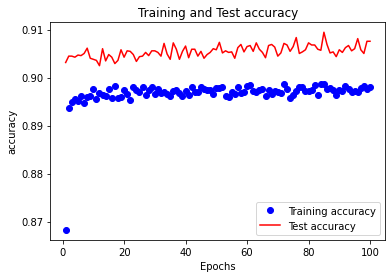

In [0]:
# plotting accuracy

history_dict =  h.history

train_loss = history_dict['accuracy']
test_loss = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy'])+1)


plt.plot(epochs, train_loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, test_loss, 'r', label = 'Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()